<a href="https://colab.research.google.com/github/BrianM50/MAT-422/blob/main/Section_2_4_(Maximum_Likelihood_Estimation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize
print('Maximum Likelihood Estimation is a method of estimating the parameters of a probability distribution through maximizing a likelihood function. ')

Maximum Likelihood Estimation is a method of estimating the parameters of a probability distribution through maximizing a likelihood function. 


In [9]:
print('In this example we will first perform simple linear regression on a normally distributed dataset.')
x = np.linspace(0, 30, 100)
e = np.random.normal(0, 5, 100)
y = 5*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()


In this example we will first perform simple linear regression on a normally distributed dataset.


,x,y
0,0.000000,-2.841623
1,0.303030,-1.322347
2,0.606061,8.263206
3,0.909091,13.080627
4,1.212121,0.737438


Since the output variable is a continuously varying number, the Ordinary Least Squares method can be used to find the model parameters. 


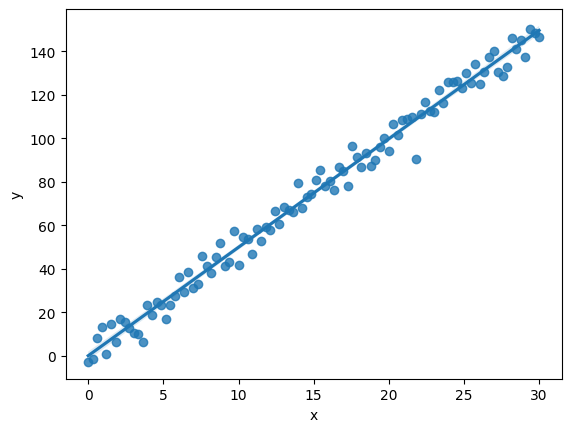

In [10]:
print('Since the output variable is a continuously varying number, the Ordinary Least Squares method can be used to find the model parameters. ')
sns.regplot(x='x', y='y', data = df)
plt.show()

In [11]:
print('Using the Ordinary Least Squares method we obtain the intercept and regression coefficient values of the linear regression model.')
print('These parameters will be used to compare the parameters we obtain using the Maximum Likelihood Estimation method.')
print('')
features = api.add_constant(df.x)
model = api.OLS(y, features).fit()
model.summary()

Using the Ordinary Least Squares method we obtain the intercept and regression coefficient values of the linear regression model.
These parameters will be used to compare the parameters we obtain using the Maximum Likelihood Estimation method.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7120.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           2.61e-93
Time:                        02:54:41   Log-Likelihood:                -305.12
No. Observations:                 100   AIC:                             614.2
Df Residuals:                      98   BIC:                             619.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      1.026      0.008      0.994      -2.028       2.044
x              4.9848      0.059     84.379      0.000       4.868       5.102
==============================================================================
Omnibus:                        4.483   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.800
Skew:                          -0.427   Prob(JB):                        0.150
Kurtosis:                       3.428   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
res = model.resid
SD = np.std(res)
print('Standard Deviation =', SD)

Standard Deviation = 5.115662401499169


In [13]:
print('Now instead of using the Ordinary Least Squares method, we will use the MLE method to solve for the model parameters.')
def MLE_Function(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x
  neg_LL = -np.sum(stats.norm.logpdf(y, pred, std_dev))
  return neg_LL

Now instead of using the Ordinary Least Squares method, we will use the MLE method to solve for the model parameters.


In [14]:
print('Using the MLE method we see that the model parameters we obtained are the same as the ones we obtained using the OLS method.')
mle_results = minimize(MLE_Function, np.array([2,2,2]), method='Nelder-Mead')
mle_results_df = pd.DataFrame({'coef':mle_results['x']})
mle_results_df.index = ['Constant', 'x', 'Standard Deviation']
mle_results_df.head()

Using the MLE method we see that the model parameters we obtained are the same as the ones we obtained using the OLS method.


,coef
Constant,0.007911
x,4.984820
Standard Deviation,5.115662
